Agrupación Causa/Tipo de accidente
"A partir de su latitud y longitud"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("cleaned_nacional.csv", encoding='latin-1')

In [ ]:
print(df.head())
print(df.columns)

   EDO  MES  ANIO  MPIO  HORA  MINUTOS  DIA  DIASEMANA  URBANA  SUBURBANA  \
0    1    1  2019     1     4        0    3          4       1          0   
1    1    1  2019     1     9       45    3          4       1          0   
2    1    1  2019     1    10       40    3          4       1          0   
3    1    1  2019     1    14       55    3          4       1          0   
4    1    1  2019     1    19        0    3          4       1          0   

   ...  CICLMUERTO  CICLHERIDO  OTROMUERTO  OTROHERIDO  TOTMUERTOS  \
0  ...           0           0           0           0           0   
1  ...           0           0           0           0           0   
2  ...           0           0           0           0           0   
3  ...           0           0           0           0           0   
4  ...           0           0           0           0           0   

   TOTHERIDOS  CLASE                                      CALLE1   LONGITUD  \
0           0      3  BOULEVARD LICEN

In [ ]:
columnas = [
    "TIPACCID",      # tipo de accidente
    "CAUSAACCI",     # causa del accidente
    "TOTMUERTOS",    # número de fallecidos
    "TOTHERIDOS",    # número de heridos
    "LONGITUD",      # ubicación
    "LATITUD"        # ubicación
]

df_sub = df[columnas].copy()

In [ ]:
# Eliminar filas con nulos en las columnas seleccionadas
df_sub.dropna(inplace=True)

# Verifica que no queden nulos
print(df_sub.isnull().sum())

TIPACCID      0
CAUSAACCI     0
TOTMUERTOS    0
TOTHERIDOS    0
LONGITUD      0
LATITUD       0
dtype: int64


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sub)

# df_scaled es un array NumPy escalado
df_scaled = pd.DataFrame(df_scaled, columns=df_sub.columns)

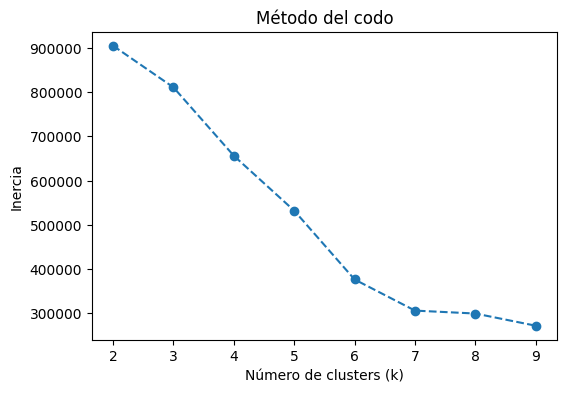

In [ ]:
inertia = []
K_range = range(2, 10)
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(df_scaled)
    inertia.append(kmeans_temp.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'o--')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.show()


In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df_scaled)

# Agregamos la asignación de cluster al DataFrame original (o al escalado)
df_sub['cluster'] = labels

In [ ]:
print(df_sub['cluster'].value_counts())

cluster
0    71509
2    71232
1    21341
3    16137
Name: count, dtype: int64


In [ ]:
print(df_sub.groupby('cluster').mean())

         TIPACCID  CAUSAACCI  TOTMUERTOS  TOTHERIDOS    LONGITUD    LATITUD
cluster                                                                    
0        3.763205   1.017075    0.012921    0.303934 -100.026207  20.754616
1        2.428799   1.031629    0.007263    0.255471 -111.680748  29.302716
2        1.463163   1.004169    0.000084    0.057137 -100.866850  25.470657
3        2.790729   4.484043    0.003470    0.173514 -101.546722  25.377361


In [ ]:
df_sub.groupby('cluster')['TIPACCID'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,71509.0,3.763205,3.834243,1.0,1.0,1.0,6.0,12.0
1,21341.0,2.428799,2.834113,1.0,1.0,1.0,2.0,12.0
2,71232.0,1.463163,1.094715,1.0,1.0,1.0,1.0,7.0
3,16137.0,2.790729,2.947885,1.0,1.0,1.0,4.0,12.0


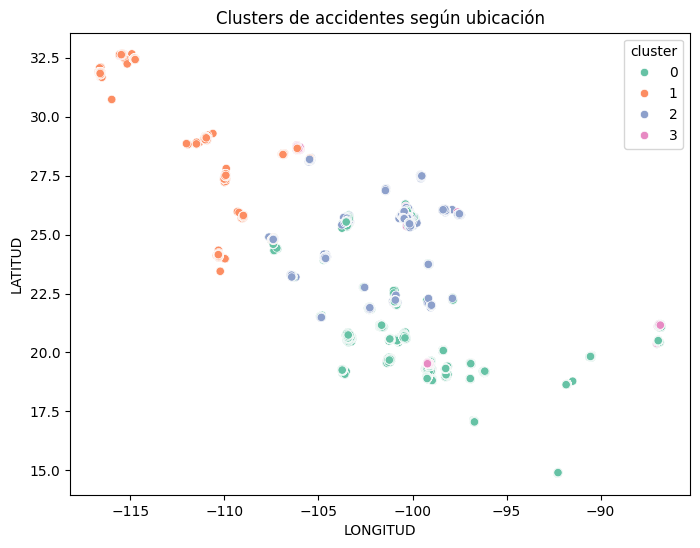

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_sub,
    x='LONGITUD',
    y='LATITUD',
    hue='cluster',
    palette='Set2'
)
plt.title("Clusters de accidentes según ubicación")
plt.show()

In [ ]:
#El archivo se limita a 5000 registros, los datos se pueden visualizar
import folium
df_sample = df_sub.sample(n=5000, random_state=42)  # tomar 5,000 registros

m = folium.Map(location=[25.90, -102.42], zoom_start=12)
for _, row in df_sample.iterrows():
    folium.Marker(
        location=[row['LATITUD'], row['LONGITUD']],
        popup=f"Tipo: {row['TIPACCID']}, Causa: {row['CAUSAACCI']}"
    ).add_to(m)

m.save("accidentes_sample_map2.html")

Tipos y causa de accidente en cierta zona, apartir de su latitud y longitud. Conclusiones: Estas zonas representan con mas frecuencia las causas y tipos de accidentes que pueden presentarse, como podemos solucionarlo: Detección de Zonas de Riesgo, Planeación Urbana y Vial, Campañas de Prevención Específicas, Asistencia a Sistemas de Navegación o Mapas, Alertas para Usuarios o Conductores.

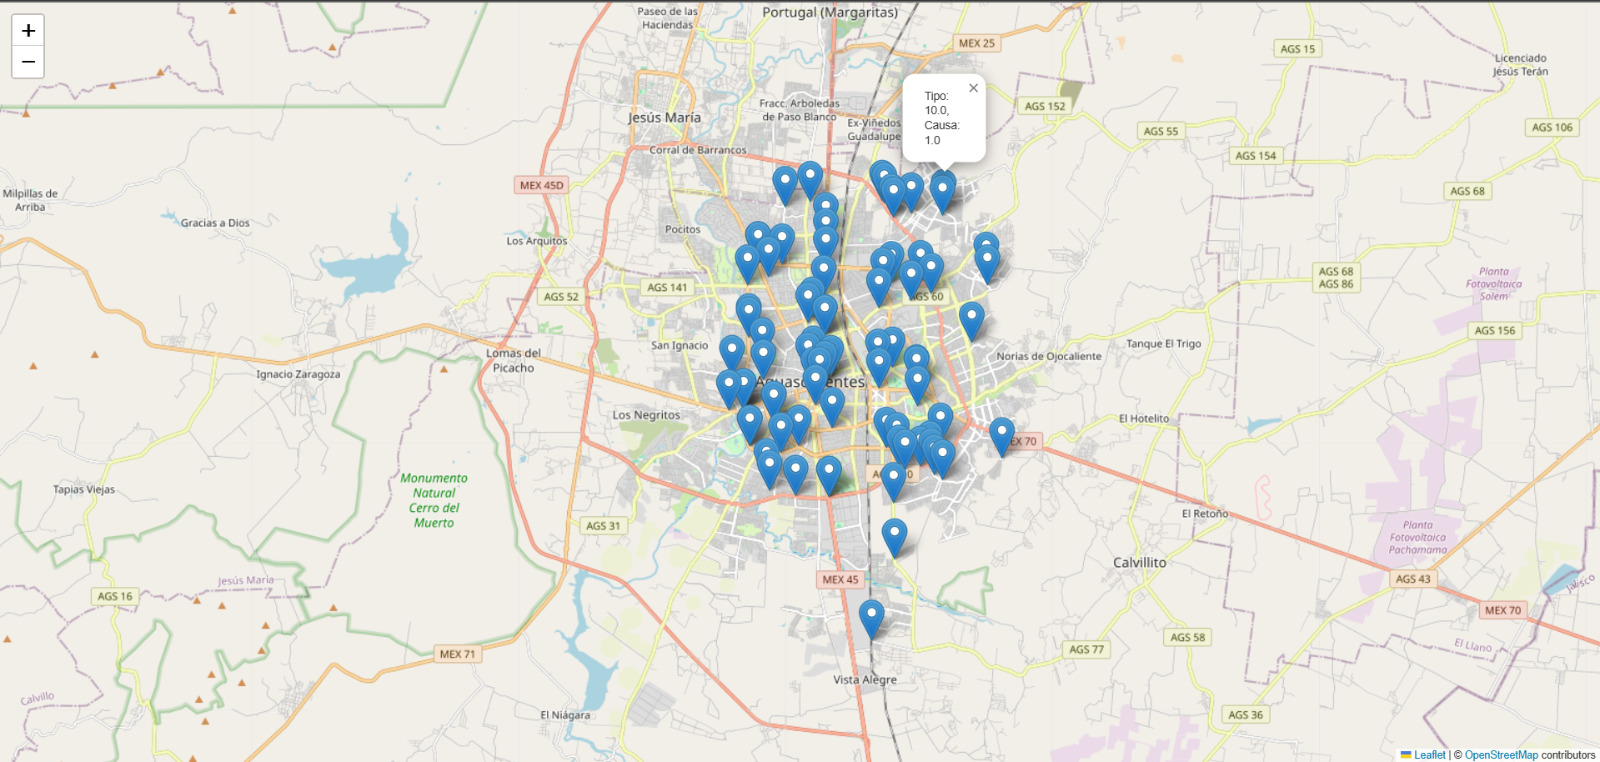